In [1]:
import pandas as pd
import numpy as np
import time
import cv2
import os
import glob
from threading import Thread

In [ ]:
path ="/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/UDI/"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
video_list = glob.glob(path + '/**/*.mp4',recursive=True)

In [ ]:
video_list_avi = glob.glob(path + '/**/*.avi',recursive=True)

In [ ]:
video_list += video_list_avi

In [ ]:
len(video_list)

6019

1 : checking video info
121
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_5-2_5-2_cam01_assault01_place08_day_summer_8.mp4
1 -------- 100.0
1 : finished
1  took  0.23  sec


[{'filename': '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_5-2_5-2_cam01_assault01_place08_day_summer_8.mp4',
  'fps': 29.97002997002997,
  'frame count': 282,
  'height': 406,
  'width': 720}]

In [ ]:
def get_video_information(video_list,idx):
    st = time.time()
    print('{} : checking video info'.format(idx))
    vid_info = list()
    cnt = 0
    for video in video_list:
        cap = cv2.VideoCapture(video)
        fps = cap.get(cv2.CAP_PROP_FPS)
        width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        fcnt = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            else:
                fcnt+=1
        #print(fcnt)
        cap.release()
        
        vid_info.append({'filename':video,'width':width,'height':height,'fps':fps,'frame count':fcnt})
        cnt += 1
        print(video)
        if int(cnt/len(video_list)) == 50:
            print(idx,' half way through!!')
        print(idx, '--------' , round(cnt/len(video_list)*100,2))
    print('{} : finished'.format(idx))
    print(idx,' took ', round(time.time()-st , 2), ' sec')
    return vid_info

In [ ]:
class ThreadWithResult(Thread):
    def __init__(self, group=None, target=None, name=None, args=(), kwargs={}, *, daemon=None):
        def function():
            self.result = target(*args, **kwargs)
        super().__init__(group=group, target=function, name=name, daemon=daemon)

In [ ]:
thread= [None] * 8
result = [None] * 8
#video_list = video_list[:100]
prev = 0
for i in range(1,9):
    next = i * int(len(video_list)/8 +1)
    partition = video_list[prev:next]
    print('start thread ', i)
    print(len(partition))
    time.sleep(10)
    thread[i-1] = ThreadWithResult(target=get_video_information, args=(partition,i))
    thread[i-1].start()
    prev = next

vid_info_result = list()
for i in range(8):
    thread[i].join()
    vid_info_result += (thread[i].result)

Streaming output truncated to the last 5000 lines.
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/UDI/split_cropped_nofight/AA-N-UBI-N_307_0_0_1_0_10.mp4
7 -------- 36.79
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/UDI/split_cropped_nofight/AA-N-UBI-N_199_0_0_1_0_18.mp4
8 -------- 66.98
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/UDI/split_cropped_nofight/AA-N-UBI-N_265_0_0_1_0_19.mp4
6 -------- 80.35
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/UDI/split_cropped_nofight/AA-N-UBI-N_729_1_0_1_0_5.mp4
1 -------- 81.94
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/UDI/split_cropped_nofight/AA-N-UBI-N_361_0_0_1_0_16.mp4
5 -------- 39.18
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/UDI/split_cropped_nofight/AA-N-UBI-N_307_0_0_1_0_9.mp4
7 -------- 36.92
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/UDI/split_croppe

In [ ]:
len(vid_info_result)

6019

In [ ]:
vid_info_df2

,filename,width,height,fps,frame count,video length
0,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.0,92,4.037367
1,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.0,92,2.435767
2,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.0,92,4.270933
3,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.0,92,3.737067
4,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.0,92,3.503500
...,...,...,...,...,...,...
6014,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.0,92,2.569233
6015,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.0,91,3.536867
6016,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.0,92,4.904900
6017,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.0,91,4.371033


In [ ]:
vid_info_df

,Unnamed: 0,filename,width,height,fps,frame count,video length
0,0,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,121,4.037367
1,1,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,73,2.435767
2,2,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,128,4.270933
3,3,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,112,3.737067
4,4,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,105,3.503500
...,...,...,...,...,...,...,...
13036,13040,/content/drive/Shareddrives/2021청년인재_고...,1920,1080,30.00000,150,5.000000
13037,13041,/content/drive/Shareddrives/2021청년인재_고...,1920,1080,30.00000,150,5.000000
13038,13042,/content/drive/Shareddrives/2021청년인재_고...,320,240,30.00000,150,5.000000
13039,13043,/content/drive/Shareddrives/2021청년인재_고...,320,240,30.00000,150,5.000000


In [ ]:
vid_info_df2 = pd.DataFrame(vid_info_result)

In [ ]:
df=pd.concat([vid_info_df,vid_info_df2])

In [ ]:
df

,filename,width,height,fps,frame count,video length
0,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,121,4.037367
1,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,73,2.435767
2,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,128,4.270933
3,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,112,3.737067
4,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,105,3.503500
...,...,...,...,...,...,...
6014,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.00000,92,2.569233
6015,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.00000,91,3.536867
6016,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.00000,92,4.904900
6017,/content/drive/Shareddrives/2021청년인재_고...,480,300,30.00000,91,4.371033


In [ ]:
df.to_csv('/content/drive/Shareddrives/2021청년인재_고려대과정_10조/video_info_0826.csv')

In [ ]:
import pandas as pd

In [38]:
vid_info_df = pd.read_csv('/content/drive/Shareddrives/2021청년인재_고려대과정_10조/video_info_yt_0823.csv')

In [39]:
vid_info_df.columns

Index(['Unnamed: 0', 'filename', 'width', 'height', 'fps', 'frame count'], dtype='object')

In [40]:
vid_info_df.drop(columns=['Unnamed: 0'],inplace=True)

In [41]:
vid_info_df['video length']=vid_info_df['frame count']/vid_info_df['fps']

In [42]:
vid_info_df['video length'].mean()

5.609132432792631

In [43]:
vid_info_df

,filename,width,height,fps,frame count,video length
0,/content/drive/Shareddrives/2021청년인재_고...,1104,540,30.000000,305,10.166667
1,/content/drive/Shareddrives/2021청년인재_고...,1104,540,30.000000,165,5.500000
2,/content/drive/Shareddrives/2021청년인재_고...,648,488,29.437500,157,5.333333
3,/content/drive/Shareddrives/2021청년인재_고...,1912,752,23.863636,70,2.933333
4,/content/drive/Shareddrives/2021청년인재_고...,1912,752,22.909091,42,1.833333
...,...,...,...,...,...,...
1454,/content/drive/Shareddrives/2021청년인재_고...,1280,720,25.000000,184,7.360000
1455,/content/drive/Shareddrives/2021청년인재_고...,1280,720,25.000000,165,6.600000
1456,/content/drive/Shareddrives/2021청년인재_고...,1280,720,25.000000,143,5.720000
1457,/content/drive/Shareddrives/2021청년인재_고...,1280,720,25.000000,236,9.440000


In [44]:
vid_info_df[vid_info_df['filename'].map(lambda x: ('-N-UBI' in x) or ('_V_UBI' in x))].count()

filename        0
width           0
height          0
fps             0
frame count     0
video length    0
dtype: int64

In [46]:
names=['AH','UCF','FD','RWF','GIT','UBI','YT']
for name in names:
    print(name, ' ------------------')
    print('fight: ', vid_info_df[vid_info_df['filename'].map(lambda x: ('-N-'+name in x) or ('_N_'+ name in x))]['filename'].count(),'/ nofight : ', vid_info_df[vid_info_df['filename'].map(lambda x: ('-V-'+ name in x) or ('_V_'+ name  in x))]['filename'].count(), " / mean : ",  vid_info_df[vid_info_df['filename'].map(lambda x: (name in x) or (name in x))]['video length'].mean(),' / sum : ', vid_info_df[vid_info_df['filename'].map(lambda x: (name in x) or (name in x))]['video length'].sum())

AH  ------------------
fight:  0 / nofight :  0  / mean :  nan  / sum :  0.0
UCF  ------------------
fight:  0 / nofight :  0  / mean :  nan  / sum :  0.0
FD  ------------------
fight:  0 / nofight :  0  / mean :  nan  / sum :  0.0
RWF  ------------------
fight:  0 / nofight :  0  / mean :  nan  / sum :  0.0
GIT  ------------------
fight:  0 / nofight :  0  / mean :  nan  / sum :  0.0
UBI  ------------------
fight:  0 / nofight :  0  / mean :  nan  / sum :  0.0
YT  ------------------
fight:  1093 / nofight :  366  / mean :  5.609132432792631  / sum :  8183.724219444444


In [36]:
vid_info_df['video length'].mean(), vid_info_df['video length'].sum()

(3.6552619723617408, 69669.2931932163)

In [18]:
vid_info_df[vid_info_df['filename'].map(lambda x: ('UBI' in x) or ('UBI' in x))]['video length'].sum()

18393.033333333333

In [ ]:
vid_info_df[vid_info_df['filename'].map(lambda x: ('-V-' in x) or ('_V_' in x))]

,filename,width,height,fps,frame count,video length
0,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,121,4.037367
1,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,73,2.435767
2,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,128,4.270933
3,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,112,3.737067
4,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,105,3.503500
...,...,...,...,...,...,...
12938,/content/drive/Shareddrives/2021청년인재_고...,368,276,30.00000,150,5.000000
12939,/content/drive/Shareddrives/2021청년인재_고...,1920,1080,30.00000,150,5.000000
12940,/content/drive/Shareddrives/2021청년인재_고...,1280,720,30.00000,150,5.000000
12941,/content/drive/Shareddrives/2021청년인재_고...,1280,720,30.00000,150,5.000000


KeyboardInterrupt: ignored

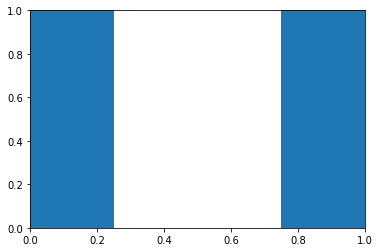

In [ ]:
vid_info_df['video length'].plot.bar()

In [ ]:
vid_info_df.drop(9358)

In [ ]:
vid_info_df[vid_info_df['frame count']<10]

,filename,width,height,fps,frame count,video length


In [ ]:
k = vid_info_df[vid_info_df['filename'].map(lambda x: ('FD' in x) or ('UCF' in x))]['filename']

In [ ]:
k[k.map(lambda x : '-V-' in x)]

9528     /content/drive/Shareddrives/2021청년인재_고...
9529     /content/drive/Shareddrives/2021청년인재_고...
9530     /content/drive/Shareddrives/2021청년인재_고...
9531     /content/drive/Shareddrives/2021청년인재_고...
9532     /content/drive/Shareddrives/2021청년인재_고...
                               ...                        
11893    /content/drive/Shareddrives/2021청년인재_고...
11894    /content/drive/Shareddrives/2021청년인재_고...
11895    /content/drive/Shareddrives/2021청년인재_고...
11896    /content/drive/Shareddrives/2021청년인재_고...
11897    /content/drive/Shareddrives/2021청년인재_고...
Name: filename, Length: 395, dtype: object

In [ ]:
k[k.map(lambda x : '-N-' in x)]

9678     /content/drive/Shareddrives/2021청년인재_고...
9679     /content/drive/Shareddrives/2021청년인재_고...
9680     /content/drive/Shareddrives/2021청년인재_고...
9681     /content/drive/Shareddrives/2021청년인재_고...
9682     /content/drive/Shareddrives/2021청년인재_고...
                               ...                        
10923    /content/drive/Shareddrives/2021청년인재_고...
10924    /content/drive/Shareddrives/2021청년인재_고...
12425    /content/drive/Shareddrives/2021청년인재_고...
12426    /content/drive/Shareddrives/2021청년인재_고...
12699    /content/drive/Shareddrives/2021청년인재_고...
Name: filename, Length: 1023, dtype: object

In [ ]:
vid_info_df[vid_info_df[vid_info_df['filename'].map(lambda x: 'FD' in x)]['filename'].map(lambda x : '-V-' in x)]

In [ ]:
vid_info_df[vid_info_df['filename'].map(lambda x: 'FD' in x)].describe()

,width,height,fps,frame count,video length
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,789.414330,470.155763,26.712323,63.146417,2.339592
std,387.737644,199.796429,4.926801,27.692853,0.808404
min,204.000000,216.000000,10.000000,20.000000,1.001000
25%,480.000000,360.000000,25.000000,50.000000,2.000000
50%,640.000000,360.000000,29.970030,60.000000,2.002000
75%,1280.000000,720.000000,29.970030,61.000000,2.120000
max,1920.000000,1080.000000,30.000000,150.000000,5.000000


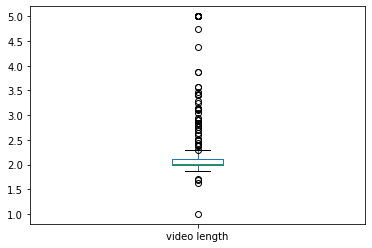

In [ ]:
vid_info_df[vid_info_df['filename'].map(lambda x: 'FD' in x)]['video length'].plot.box()

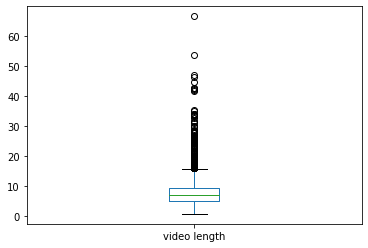

In [ ]:
vid_info_df['video length'].plot.box()

In [ ]:
vid_info_df.sort_values(by='video length' ,ascending=False).iloc[:25].filename.tolist()

['/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_7-2_7-2_cam02_assault01_place04_day_spring_18.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_04_18-1_18-1_cam02_assault04_place02_night_summer_2.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_07_4-1_4-1_cam01_assault01_place01_day_spring_6.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_07_4-1_4-1_cam02_assault01_place01_day_spring_6.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_5-1_5-1_cam02_assault01_place08_day_summer_5.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_04_18-1_18-1_cam01_assault04_place02_night_spri

KeyboardInterrupt: ignored

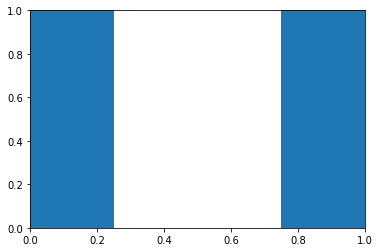

In [ ]:
vid_info_df['video length'].map(int).plot(kind='bar')

In [ ]:
vid_info_df['vid len int'] = vid_info_df['video length'].map(int)

In [ ]:
grouped = vid_info_df.groupby('vid len int')

In [ ]:
grouped.plot()

In [ ]:
k = list()
c = list()
for key, group in grouped:
    print("* key", key)
    k.append(key)
    c.append(len(group))
    print("* count", len(group))
    print('\n')

* key 0
* count 71


* key 1
* count 568


* key 2
* count 3820


* key 3
* count 2839


* key 4
* count 2749


* key 5
* count 2398


* key 6
* count 129


* key 7
* count 106


* key 8
* count 81


* key 9
* count 54


* key 10
* count 31


* key 11
* count 34


* key 12
* count 38


* key 13
* count 15


* key 14
* count 14


* key 15
* count 9


* key 16
* count 11


* key 17
* count 5


* key 18
* count 7


* key 19
* count 4


* key 20
* count 9


* key 21
* count 3


* key 22
* count 2


* key 23
* count 6


* key 24
* count 5


* key 25
* count 6


* key 26
* count 9


* key 27
* count 4


* key 31
* count 1


* key 32
* count 1


* key 33
* count 1


* key 34
* count 1


* key 36
* count 1


* key 37
* count 2


* key 39
* count 2


* key 40
* count 1


* key 44
* count 1


* key 45
* count 1


* key 47
* count 1


* key 59
* count 1




In [ ]:
import matplotlib.pyplot as plt

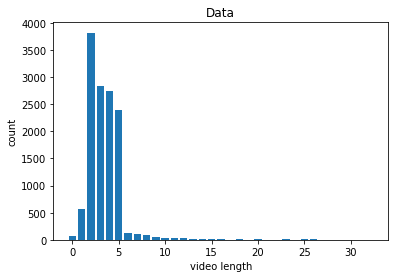

In [ ]:
plt.title('Data')
plt.ylabel('count')
plt.xlabel('video length')
plt.bar(k[:30],c[:30])
plt.show()

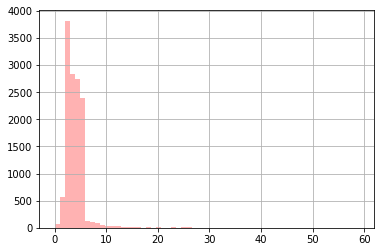

In [ ]:
vid_info_df['vid len int'].hist(bins=60, alpha=.3, color='r')
plt.show()

In [ ]:
vid_info_df.head()

,filename,width,height,fps,frame count,video length,vid len int
0,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,282,9.409400,9
1,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,105,3.503500,3
2,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,267,8.908900,8
3,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,137,4.571233,4
4,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,173,5.772433,5


In [ ]:
vid_info_df[vid_info_df.filename.map(lambda x: ('-V-' in x) or ('_V_' in x))]

,filename,width,height,fps,frame count,video length,vid len int
0,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,282,9.409400,9
1,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,105,3.503500,3
2,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,267,8.908900,8
3,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,137,4.571233,4
4,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,173,5.772433,5
...,...,...,...,...,...,...,...
12120,/content/drive/Shareddrives/2021청년인재_고...,512,288,30.00000,150,5.000000,5
12121,/content/drive/Shareddrives/2021청년인재_고...,480,272,30.00000,150,5.000000,5
12122,/content/drive/Shareddrives/2021청년인재_고...,480,272,30.00000,150,5.000000,5
12123,/content/drive/Shareddrives/2021청년인재_고...,480,272,30.00000,150,5.000000,5


In [ ]:
vid_info_df[vid_info_df.filename.map(lambda x: ('-N-' in x) or ('_N_' in x))]

,filename,width,height,fps,frame count,video length,vid len int
5050,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,131,4.371033,4
5051,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,251,8.375033,8
5052,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,256,8.541867,8
5053,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,151,5.038367,5
5054,/content/drive/Shareddrives/2021청년인재_고...,720,406,29.97003,286,9.542867,9
...,...,...,...,...,...,...,...
12920,/content/drive/Shareddrives/2021청년인재_고...,398,224,30.00000,150,5.000000,5
12921,/content/drive/Shareddrives/2021청년인재_고...,398,224,30.00000,150,5.000000,5
12922,/content/drive/Shareddrives/2021청년인재_고...,398,224,30.00000,150,5.000000,5
12923,/content/drive/Shareddrives/2021청년인재_고...,398,224,30.00000,150,5.000000,5


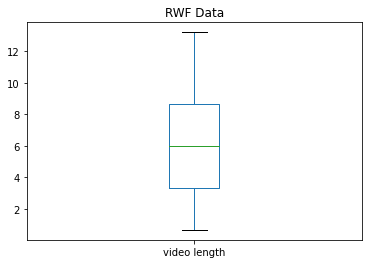

In [ ]:
plt.title('RWF Data') # UCF/RWF/YT/AH/FD
vid_info_df[vid_info_df.filename.map(lambda x: ('FD' in x) or ('UCF' in x))]['video length'].plot.box()

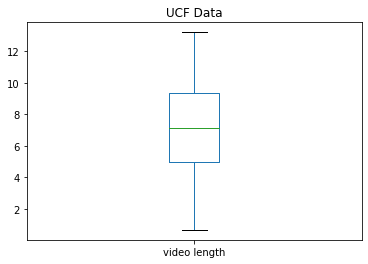

In [ ]:
plt.title('UCF Data') # UCF/RWF/YT/AH/FD
vid_info_df[vid_info_df.filename.map(lambda x: ('UCF' in x))]['video length'].plot.box()

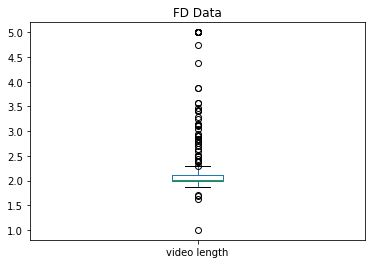

In [ ]:
plt.title('FD Data') # UCF/RWF/YT/AH/FD
vid_info_df[vid_info_df.filename.map(lambda x: ('FD' in x))]['video length'].plot.box()

In [ ]:
vid_info_df[vid_info_df.filename.map(lambda x: not ('-AH' in x))].filename.tolist()[:10]

['/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_5-2_5-2_cam01_assault01_place08_day_summer_8.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_5-2_5-2_cam01_assault01_place08_day_summer_2.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_5-2_5-2_cam01_assault01_place08_day_summer_10.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_5-2_5-2_cam01_assault01_place08_day_summer_9.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_5-2_5-2_cam01_assault01_place08_day_summer_7.mp4',
 '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/AIHub_Dataset/fight/AA_V_AH_outsidedoor_08_5-2_5-2_cam01_assault01_place08_day_summer_3.mp4

In [ ]:
pp = '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/'

In [ ]:
import glob
li = glob.glob(pp + '**/*.avi', recursive=True)

In [ ]:
len(li)

1396

In [ ]:
save_p = '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/temp/fight/'
save_pp = '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/temp/nofight/'

In [ ]:
fight_p = '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/Fight/'
nofight_p = '/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/NonFight/'

In [ ]:
import shutil

cnt = 0
for vid in glob.glob(fight_p + '**/*.avi', recursive=True):
  name = os.path.basename(vid)
  shutil.copy(vid, save_p + name)
  os.remove(vid)
  print(vid)
  if cnt>100:
    break
  cnt += 1

/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/Fight/AA-V-RWF-EtRfZ2KP_5.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/Fight/AA-V-RWF--1l5631l3fg_0.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/Fight/AA-V-RWF--1l5631l3fg_1.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/Fight/AA-V-RWF--1l5631l3fg_2.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/Fight/AA-V-RWF-0H2s9UJcNJ0_0.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/Fight/AA-V-RWF-0H2s9UJcNJ0_2.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/Fight/AA-V-RWF-0H2s9UJcNJ0_3

In [ ]:
import shutil

cnt = 0
for vid in glob.glob(nofight_p + '**/*.avi', recursive=True):
  name = os.path.basename(vid)
  shutil.copy(vid, save_pp + name)
  os.remove(vid)
  print(vid)
  if cnt>100:
    break
  cnt += 1

/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/NonFight/AA-N-RWF--1l5631l3fg_0.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/NonFight/AA-N-RWF--1l5631l3fg_1.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/NonFight/AA-N-RWF-0AvTZRYx_0.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/NonFight/AA-N-RWF-0GGPb4iO_0.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/NonFight/AA-N-RWF-0H2s9UJcNJ0_0.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/NonFight/AA-N-RWF-0H2s9UJcNJ0_1.avi
/content/drive/Shareddrives/2021청년인재_고려대과정_10조/Test Data/Except AIHub/Same Length/RWF_2000/train/NonFight/AA-N